In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib

In [ ]:
tf.__version__, np.__version__, matplotlib.__version__

('2.16.1', '1.25.2', '3.7.1')

Importação da base cifar10

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt

Carregamento da base de dados e normalização

In [ ]:
(previsores_treinamento, _), (previsores_teste, _) = cifar10.load_data()
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 893s 5us/step


Como essa base de dados apresenta imagens coloridas temos 3 canais e não somente um canal como na base MNIST. As dimensão dessas imagens é 32 x 32, portanto teremos um total de 3072 características (32 x 32 x 3 canais).

In [ ]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

Criação do autoencoder

In [ ]:
autoencoder = Sequential()

ENCODE

Estrutura do encoder: 3072 - 1536 - 768 - 1536 - 3072

Você pode testar com outras arquiteturas também, mas uma dica é dividir as dimensões pela metade. Por exemplo, para chegar no valor de 1536 dividimos
3072 / 2 e para chegar no valor de 768 dividimos 1532 / 2.

Trabalharemos com a dimensão mínima de 768, ou seja, de 3072 pixels reduziremos para 768.

Como são imagens com mais pixels, se diminuirmos muito a dimensão final o autoencoder pode apresentar resultados ruins.

O número de entradas é 3072 que equivale ao número total de pixels da imagem.

In [ ]:
autoencoder.add(InputLayer(shape=(3072,)))
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=768, activation='relu'))

DECODE

Faz o processo inverso, ou seja, 768 - 1536 - 3072

In [ ]:
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=3072, activation='sigmoid'))

Compilação e aprendizagem, mantendo os parâmetros padrões.

Os resultados não serão tão bons caso use um número pequeno de épocas.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs=100, batch_size=256, validation_data=(previsores_teste, previsores_teste))

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 96s 447ms/step - accuracy: 0.0021 - loss: 0.6522 - val_accuracy: 0.0046 - val_loss: 0.6049
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 103s 523ms/step - accuracy: 0.0045 - loss: 0.5978 - val_accuracy: 0.0065 - val_loss: 0.5881
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 96s 489ms/step - accuracy: 0.0066 - loss: 0.5862 - val_accuracy: 0.0082 - val_loss: 0.5828
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 97s 491ms/step - accuracy: 0.0081 - loss: 0.5808 - val_accuracy: 0.0092 - val_loss: 0.5789
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 85s 434ms/step - accuracy: 0.0090 - loss: 0.5773 - val_accuracy: 0.0079 - val_loss: 0.5767
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.0102 - loss: 0.5768 - val_accuracy: 0.0119 - val_loss: 0.5761
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 89s 445ms/step - accuracy: 0.0109 - loss: 0.5741 - val_accuracy: 0.0104 - val_loss: 0.5736
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 88s 398ms/step - accuracy: 0.0135 

Cria um novo modelo para capturar somente a aprendizagem da rede, que é o codificador

In [ ]:
dimensao_original = Input(shape=(3072,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
encoder = Model(dimensao_original, camada_encoder2(camada_encoder1(dimensao_original)))

Cria as variáveis com as imagens codificadas e decodificadas

In [ ]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


Visualiza 10 imagens escolhidas aleatoriamente

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

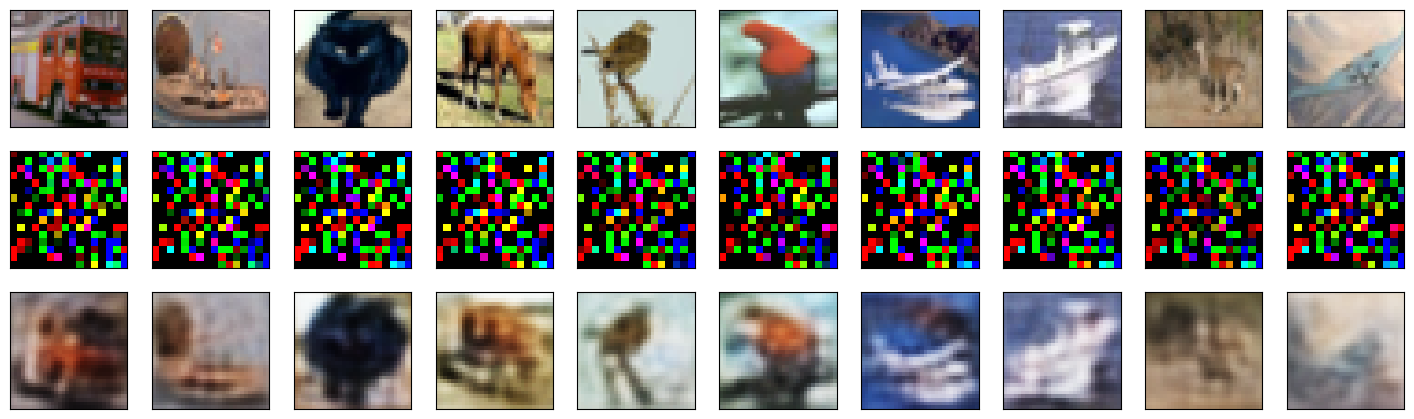

In [ ]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size=numero_imagens)
plt.figure(figsize=(18, 18))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())

    # Imagem codificada, nas dimensões 16x16 com 3 canais
    # Se multiplicar os três valores teremos o valor mínimo que é 768 pixels
    eixo = plt.subplot(10, 10, numero_imagens + i + 1)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 16, 3))
    plt.xticks(())
    plt.yticks(())

    # Imagem decodificada, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()